<a href="https://colab.research.google.com/github/kamalbec2005/MachineLearningPractices/blob/master/ImageClassification_MultilayerNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
'''
1) Dlaod the data set from imsage
2) Create layers
3) Choose the model
4) Train the model
5) Test the model
6) Predict the model
'''

import tensorflow as tf
import tensorflow_datasets as tfds
tf.logging.set_verbosity(tf.logging.ERROR)
tf.enable_eager_execution()

print(tf.__version__)

#Improve the progress bar
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm


1.13.1


In [4]:
#1) Loading data sets
dataset, metadata = tfds.load("fashion_mnist", as_supervised=True, with_info = True)
train_data_set, test_data_set = dataset['train'],dataset['test']

class_names = ["T-Shirt/Top", "Trouser", "Pullover", "Dress", "coat", "sandal", "shirt", "sneaker", "bag", "Ankleboot"]


Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/1.0.0. Subsequent calls will reuse this data.


In [5]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

print("Num of training examples = ", num_train_examples)
print("Num of testing examples = ", num_test_examples)



Num of training examples =  60000
Num of testing examples =  10000


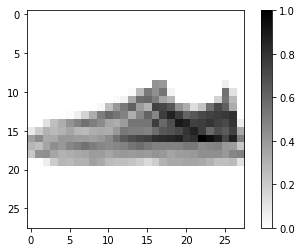

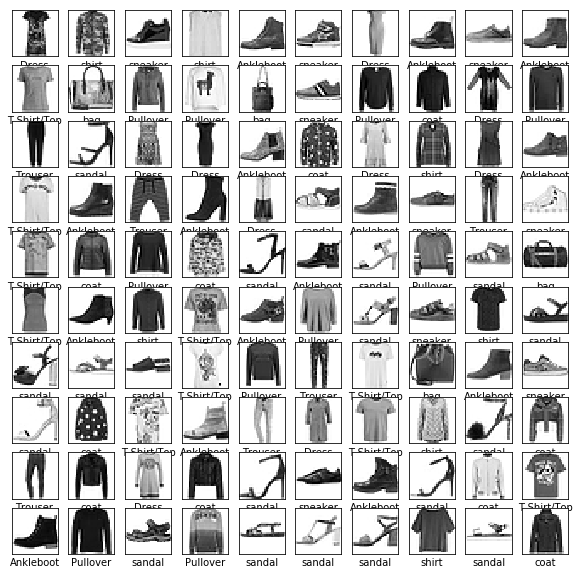

In [6]:
#2) Preprocessing the datasets: Convert from 0to255 to 0 to 1.

def normalise(data, lable):
  data = tf.cast(data, tf.float32)
  data /= 255
  return data, lable

train_data = train_data_set.map(normalise)
test_data = test_data_set.map(normalise)

#Take a single image check how it looks like
for image, lable in train_data.take(1):
  break
  
image = image.numpy().reshape(28,28)

import matplotlib.pyplot as plt

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()


i = 0
plt.figure(figsize = (10,10))
#Take a single image check how it looks like
for (image, label) in train_data.take(100):
  image = image.numpy().reshape(28,28)
  plt.subplot(10,10,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(image, cmap=plt.cm.binary)

  plt.xlabel(class_names[label])
  i +=1
  
plt.show()
  






In [0]:
 #3) Build the model
model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28,1)),
      tf.keras.layers.Dense(units = 128, activation = tf.nn.relu),
      tf.keras.layers.Dense(units = 10, activation = tf.nn.softmax)
  ])
  
#Compile model
model.compile(optimizer='adam',
             loss = "sparse_categorical_crossentropy",
             metrics = ["accuracy"])

In [8]:
#4) Training the model
import math

BATCH_SIZE = 32
train_data = train_data.repeat().shuffle(num_train_examples).batch(BATCH_SIZE) 
test_data = test_data.batch(BATCH_SIZE) 
model.fit(train_data, epochs=5, steps_per_epoch = math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4904 - acc: 0.8286
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3729 - acc: 0.8645
Epoch 3/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3359 - acc: 0.8787
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3151 - acc: 0.8850
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2944 - acc: 0.8921


In [9]:
test_loss, test_accuracy = model.evaluate(test_data, steps=math.ceil(num_test_examples/32))

313/313 [==============================] - 2s 7ms/step - loss: 0.3819 - acc: 0.8657


In [0]:
#5) Prediction

for test_image, label in test_data.take(1):
  test_images = test_image.numpy()
  test_labels = label.numpy()
  predictions = model.predict(test_images)

In [15]:
print(predictions[0])
print(type(predictions))


[1.4015244e-04 5.3591458e-07 1.0991415e-02 3.5436623e-04 1.0400303e-01
 1.1686577e-06 8.8441277e-01 1.6631612e-08 9.6582182e-05 1.3555895e-09]
<class 'numpy.ndarray'>


In [17]:
import numpy as np
print(np.argmax(predictions[0]))
print(test_labels[0])

6
6
